### Importing the libraries

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
df = pd.read_csv("diabetes.csv")
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [13]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

### But the dataset is incorrect as we can see few people having zero BloodPressure, Glucose, SkinThickness, Insulin and BMI which realistically are impossible. So we need to find those missing values and replace them with the median values.

### Finding 0's and Replacing them with NaN

In [23]:
df['Glucose'] = df['Glucose'].replace('0',np.nan)
df['BloodPressure'] = df['BloodPressure'].replace('0', np.nan) 
df['SkinThickness'] = df['SkinThickness'].replace('0', np.nan) 
df['Insulin'] = df['Insulin'].replace('0', np.nan)        
df['BMI'] = df['BMI'].replace('0', np.nan) 
df['DiabetesPedigreeFunction'] = df['DiabetesPedigreeFunction'].replace('0', np.nan) 
df['Age'] = df['Age'].replace('0', np.nan)

### Replacing NaN with median values

In [26]:
df['BMI'].fillna(df['BMI'].median(), inplace=True)
df['Glucose'].fillna(df['Glucose'].median(), inplace=True)
df['BloodPressure'].fillna(df['BloodPressure'].median(), inplace=True)
df['SkinThickness'].fillna(df['SkinThickness'].median(), inplace=True)
df['Insulin'].fillna(df['Insulin'].median(), inplace=True)

### Drawing Correlation Plot

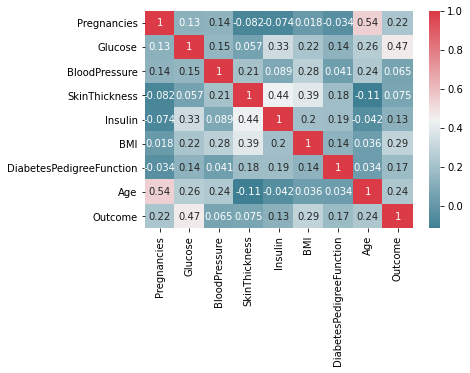

In [28]:
corr = df[df.columns].corr()
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, cmap=cmap, annot = True)

### From the above correlation plot we can see that the Outcome is mainly dependent on Glucose(0.47) followed by BMI(0.29), Age(0.24) and Pregnancies(0.22). So we are going to consider only those as features(X) and the Outcome as label(Y).

In [34]:
X = pd.DataFrame(data = df, columns = ["Glucose","BMI","Age","Pregnancies"])
X.head()

,Glucose,BMI,Age,Pregnancies
0,148,33.6,50,6
1,85,26.6,31,1
2,183,23.3,32,8
3,89,28.1,21,1
4,137,43.1,33,0


In [36]:
Y = df.iloc[:,8]
Y.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

In [37]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)
X

array([[ 0.84832379,  0.20401277,  1.4259954 ,  0.63994726],
       [-1.12339636, -0.68442195, -0.19067191, -0.84488505],
       [ 1.94372388, -1.10325546, -0.10558415,  1.23388019],
       ...,
       [ 0.00330087, -0.73518964, -0.27575966,  0.3429808 ],
       [ 0.1597866 , -0.24020459,  1.17073215, -0.84488505],
       [-0.8730192 , -0.20212881, -0.87137393, -0.84488505]])

### Split Data: Training and Testing

In [39]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=0)

### 1) Decision Tree Classifier

In [40]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(random_state = 0)
dtc.fit(X_train, Y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [41]:
Y_pred = dtc.predict(X_test)

In [44]:
from sklearn.metrics import accuracy_score
accuracyPercentage = accuracy_score(Y_test, Y_pred)*100
accuracyPercentage

75.52083333333334

### We get around 75.52% accuracy using the Decision Tree classifier model

### 2) SVC ( Standard Vector Classifier) and 

In [73]:
X = pd.DataFrame(data = df, columns = ["Glucose","BMI","Age","Pregnancies"])
X.head()

,Glucose,BMI,Age,Pregnancies
0,148,33.6,50,6
1,85,26.6,31,1
2,183,23.3,32,8
3,89,28.1,21,1
4,137,43.1,33,0


In [74]:
Y = df.iloc[:,8]
Y.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

In [75]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)
X

array([[ 0.84832379,  0.20401277,  1.4259954 ,  0.63994726],
       [-1.12339636, -0.68442195, -0.19067191, -0.84488505],
       [ 1.94372388, -1.10325546, -0.10558415,  1.23388019],
       ...,
       [ 0.00330087, -0.73518964, -0.27575966,  0.3429808 ],
       [ 0.1597866 , -0.24020459,  1.17073215, -0.84488505],
       [-0.8730192 , -0.20212881, -0.87137393, -0.84488505]])

In [76]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=0)

In [84]:
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

In [85]:
svc = SVC(random_state = 0)
knn = KNeighborsClassifier(n_neighbors = 3, metric = "euclidean")

In [86]:
svc.fit(X_train, Y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

In [87]:
knn.fit(X_train, Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [89]:
Y_pred_svc = svc.predict(X_test)

In [95]:
from sklearn.metrics import accuracy_score
accuracyPercentagesvc = accuracy_score(Y_test, Y_pred_svc)*100
accuracyPercentagesvc

75.52083333333334

### We get 75.52% of accuracy using Standard Vector classifier model

### 3) KNN

In [93]:
Y_pred_knn = knn.predict(X_test)

In [96]:
accuracyPercentageknn = accuracy_score(Y_test, Y_pred_knn)*100
accuracyPercentageknn

80.20833333333334

### We get 80.2% of accuracy using KNN classifier model

### Therefore KNN classifier is the better model among the three model